https://docs.google.com/spreadsheets/d/1CHVk-t2Bk7RBycCZypeMLjxcM6U2MynypbGFFWEFkF4/edit#gid=0

# Subject

<i>I choosed my own subject from the list because the first one was not working, so my teacher told me to choose the subject I wanted. I looked over all the subjects and chose the Seoul Bike Sharing Demand because it was appealing for me and I find it realistic.</i>

https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the <b>prediction of bike count required at each hour for the stable supply of rental bikes</b>.

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

# Import all the useful libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imageio
from math import sqrt
from scipy import stats

In [3]:
import sklearn

# models we will be using
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
# model validation techniques
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from matplotlib import gridspec
# mse: metric used
from sklearn.metrics import mean_squared_error, make_scorer

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
!pip install flask

# Import the data

In [5]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv'

Firstly, we need to make a dataframe to manipulate the data.

It didn't worked with the standard .read_csv() function, and I had an error :
<i>'utf-8' codec can't decode byte 0xb0 in position 12: invalid start byte</i>

I search what this error meant and then what is the byte '0xb0' that can't be decoded. I found that I needed to look at the 'encoding' option of the .read_csv() function to get over this error. Everything went fine when I used the 'latin_1' encoding.

In [6]:
df = pd.read_csv(url, encoding = 'latin_1') 

In [7]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


# Read and explore the dataset

We imported the data and made the data frame, let's explore the values of our dataset.

In [8]:
df.head(10)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   
5  01/12/2017                100     5             -6.4           37   
6  01/12/2017                181     6             -6.6           35   
7  01/12/2017                460     7             -7.4           38   
8  01/12/2017                930     8             -7.6           37   
9  01/12/2017                490     9             -6.5           27   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   
5               1.5              2000                      -18.7   
6               1.3              2000                      -19.5   
7               0.9              2000                      -19.3   
8               1.1              2000                      -19.8   
9               0.5              1928                      -22.4   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                     0.00           0.0            0.0  Winter  No Holiday   
1                     0.00           0.0            0.0  Winter  No Holiday   
2                     0.00           0.0            0.0  Winter  No Holiday   
3                     0.00           0.0            0.0  Winter  No Holiday   
4                     0.00           0.0            0.0  Winter  No Holiday   
5                     0.00           0.0            0.0  Winter  No Holiday   
6                     0.00           0.0            0.0  Winter  No Holiday   
7                     0.00           0.0            0.0  Winter  No Holiday   
8                     0.01           0.0            0.0  Winter  No Holiday   
9                     0.23           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes  
5             Yes  
6             Yes  
7             Yes  
8             Yes  
9             Yes

In [9]:
df.shape

(8760, 14)

This dataset contains 14 variables with 8760 attributes. We can now take a look at the columns :

In [10]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

The date is an 'object' here, we can make a little change to use it as a 'datetime'

In [12]:
df["Date"] = pd.to_datetime(df.Date, format="%d/%m/%Y")

We will now separate the Date in 3 variables : Day, Month and Year. This will allow us to get rid of the datetime format and only use numbers in our study.

In [13]:
df["Day"] = df['Date'].map(lambda x: x.day)
df["Month"] = df['Date'].map(lambda x: x.month)
df["Year"] = df['Date'].map(lambda x: x.year)

In [14]:
df = df.replace('Winter', 1, regex=True)
df = df.replace('Spring', 2, regex=True)
df = df.replace('Summer', 3, regex=True)
df = df.replace('Autumn', 4, regex=True)
df = df.replace('No Holiday', 0, regex=True)
df = df.replace('Holiday', 1, regex=True)
df = df.replace('Yes', 1, regex=True)
df = df.replace('No', 0, regex=True)

In [15]:
df = df.drop(["Date"], axis=1)

Let's rename our columns and delete the unities, it will be easier to call in the future

In [16]:
df = df.rename(columns = {'Solar Radiation (MJ/m2)': 'Solar Radiation', 'Dew point temperature(°C)': 'DP Temperature', 'Visibility (10m)': 'Visibility', 'Temperature(°C)':'Temperature', 'Humidity(%)':'Humidity', 'Wind speed (m/s)':'Wind speed', 'Rainfall(mm)':'Rainfall', 'Snowfall (cm)':'Snowfall'})

df.head()

Rented Bike Count  Hour  Temperature  Humidity  Wind speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   

   DP Temperature  Solar Radiation  Rainfall  Snowfall  Seasons  Holiday  \
0           -17.6              0.0       0.0       0.0        1        0   
1           -17.6              0.0       0.0       0.0        1        0   
2           -17.7              0.0       0.0       0.0        1        0   
3           -17.6              0.0       0.0       0.0        1        0   
4           -18.6              0.0       0.0       0.0        1        0   

   Functioning Day  Day  Month  Year  
0                1    1     12  2017  
1                1    1     12  2017  
2                1    1     12  2017  
3                1    1     12  2017  
4                1    1     12  2017

Here are pairwise comparisons of the numerical features :

In [17]:
df.describe()

Rented Bike Count         Hour  Temperature     Humidity   Wind speed  \
count        8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean          704.602055    11.500000    12.882922    58.226256     1.724909   
std           644.997468     6.922582    11.944825    20.362413     1.036300   
min             0.000000     0.000000   -17.800000     0.000000     0.000000   
25%           191.000000     5.750000     3.500000    42.000000     0.900000   
50%           504.500000    11.500000    13.700000    57.000000     1.500000   
75%          1065.250000    17.250000    22.500000    74.000000     2.300000   
max          3556.000000    23.000000    39.400000    98.000000     7.400000   

        Visibility  DP Temperature  Solar Radiation     Rainfall     Snowfall  \
count  8760.000000     8760.000000      8760.000000  8760.000000  8760.000000   
mean   1436.825799        4.073813         0.569111     0.148687     0.075068   
std     608.298712       13.060369         0.868746     1.128193     0.436746   
min      27.000000      -30.600000         0.000000     0.000000     0.000000   
25%     940.000000       -4.700000         0.000000     0.000000     0.000000   
50%    1698.000000        5.100000         0.010000     0.000000     0.000000   
75%    2000.000000       14.800000         0.930000     0.000000     0.000000   
max    2000.000000       27.200000         3.520000    35.000000     8.800000   

           Seasons      Holiday  Functioning Day          Day        Month  \
count  8760.000000  8760.000000      8760.000000  8760.000000  8760.000000   
mean      2.504110     0.049315         0.966324    15.720548     6.526027   
std       1.114408     0.216537         0.180404     8.796749     3.448048   
min       1.000000     0.000000         0.000000     1.000000     1.000000   
25%       2.000000     0.000000         1.000000     8.000000     4.000000   
50%       3.000000     0.000000         1.000000    16.000000     7.000000   
75%       3.000000     0.000000         1.000000    23.000000    10.000000   
max       4.000000     1.000000         1.000000    31.000000    12.000000   

              Year  
count  8760.000000  
mean   2017.915068  
std       0.278796  
min    2017.000000  
25%    2018.000000  
50%    2018.000000  
75%    2018.000000  
max    2018.000000

We see that the number of elements for each feature is written on the first line of this description. It's useful to look at these values to see if there is any missing value, in which case we would need to predict those values or remove them from the dataset.

In our case, there is no missing value, so we can continue without having to manipulate our data for the moment.

In [18]:
df.nlargest(10, 'Rented Bike Count')

Rented Bike Count  Hour  Temperature  Humidity  Wind speed  Visibility  \
4818               3556    18         24.1        57         2.9        1301   
4866               3418    18         27.8        43         3.0        1933   
4650               3404    18         24.9        53         3.6        2000   
4842               3384    18         27.0        55         3.1        1246   
4458               3380    18         24.4        48         1.9        1998   
4890               3365    18         29.3        27         3.4        1977   
4554               3309    18         26.2        54         2.2        1183   
6810               3298    18         25.9        42         1.1        2000   
6978               3277    18         25.3        56         2.8        1992   
6858               3256    18         27.0        44         1.4        2000   

      DP Temperature  Solar Radiation  Rainfall  Snowfall  Seasons  Holiday  \
4818            15.0             0.56       0.0       0.0        3        0   
4866            14.0             1.35       0.0       0.0        3        0   
4650            14.6             1.28       0.0       0.0        3        0   
4842            17.1             1.26       0.0       0.0        3        0   
4458            12.6             0.56       0.0       0.0        3        0   
4890             8.3             1.24       0.0       0.0        3        0   
4554            16.1             0.88       0.0       0.0        3        0   
6810            11.9             0.48       0.0       0.0        4        0   
6978            15.8             0.54       0.0       0.0        4        0   
6858            13.6             0.62       0.0       0.0        4        0   

      Functioning Day  Day  Month  Year  
4818                1   19      6  2018  
4866                1   21      6  2018  
4650                1   12      6  2018  
4842                1   20      6  2018  
4458                1    4      6  2018  
4890                1   22      6  2018  
4554                1    8      6  2018  
6810                1   10      9  2018  
6978                1   17      9  2018  
6858                1   12      9  2018

In [19]:
df.nsmallest(10, 'Rented Bike Count')

Rented Bike Count  Hour  Temperature  Humidity  Wind speed  Visibility  \
3144                  0     0         14.4        82         4.6        1041   
3145                  0     1         13.6        81         3.6         886   
3146                  0     2         12.7        80         3.9         885   
3147                  0     3         11.6        81         3.1         687   
3148                  0     4         10.2        83         3.5         554   
3149                  0     5          9.7        84         1.7         447   
3150                  0     6          9.0        86         2.0         442   
3151                  0     7          8.8        85         1.1         438   
3152                  0     8          9.7        77         1.6         519   
3153                  0     9         11.8        59         2.1         975   

      DP Temperature  Solar Radiation  Rainfall  Snowfall  Seasons  Holiday  \
3144            11.3             0.00       0.0       0.0        2        0   
3145            10.3             0.00       0.0       0.0        2        0   
3146             9.3             0.00       0.0       0.0        2        0   
3147             8.4             0.00       0.0       0.0        2        0   
3148             7.4             0.00       0.0       0.0        2        0   
3149             7.1             0.00       0.0       0.0        2        0   
3150             6.7             0.00       0.0       0.0        2        0   
3151             6.4             0.11       0.0       0.0        2        0   
3152             5.8             0.68       0.0       0.0        2        0   
3153             4.0             1.44       0.0       0.0        2        0   

      Functioning Day  Day  Month  Year  
3144                0   11      4  2018  
3145                0   11      4  2018  
3146                0   11      4  2018  
3147                0   11      4  2018  
3148                0   11      4  2018  
3149                0   11      4  2018  
3150                0   11      4  2018  
3151                0   11      4  2018  
3152                0   11      4  2018  
3153                0   11      4  2018

Let's visualize some relations between the variables :

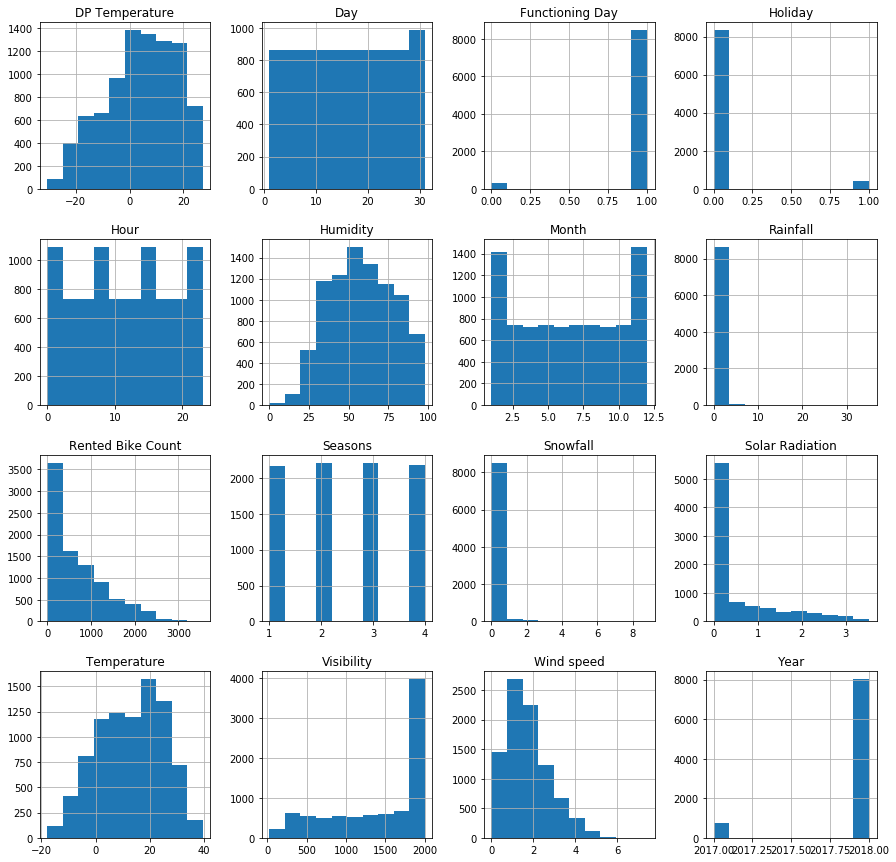

In [20]:
df.hist(figsize=(15,15))
plt.show()

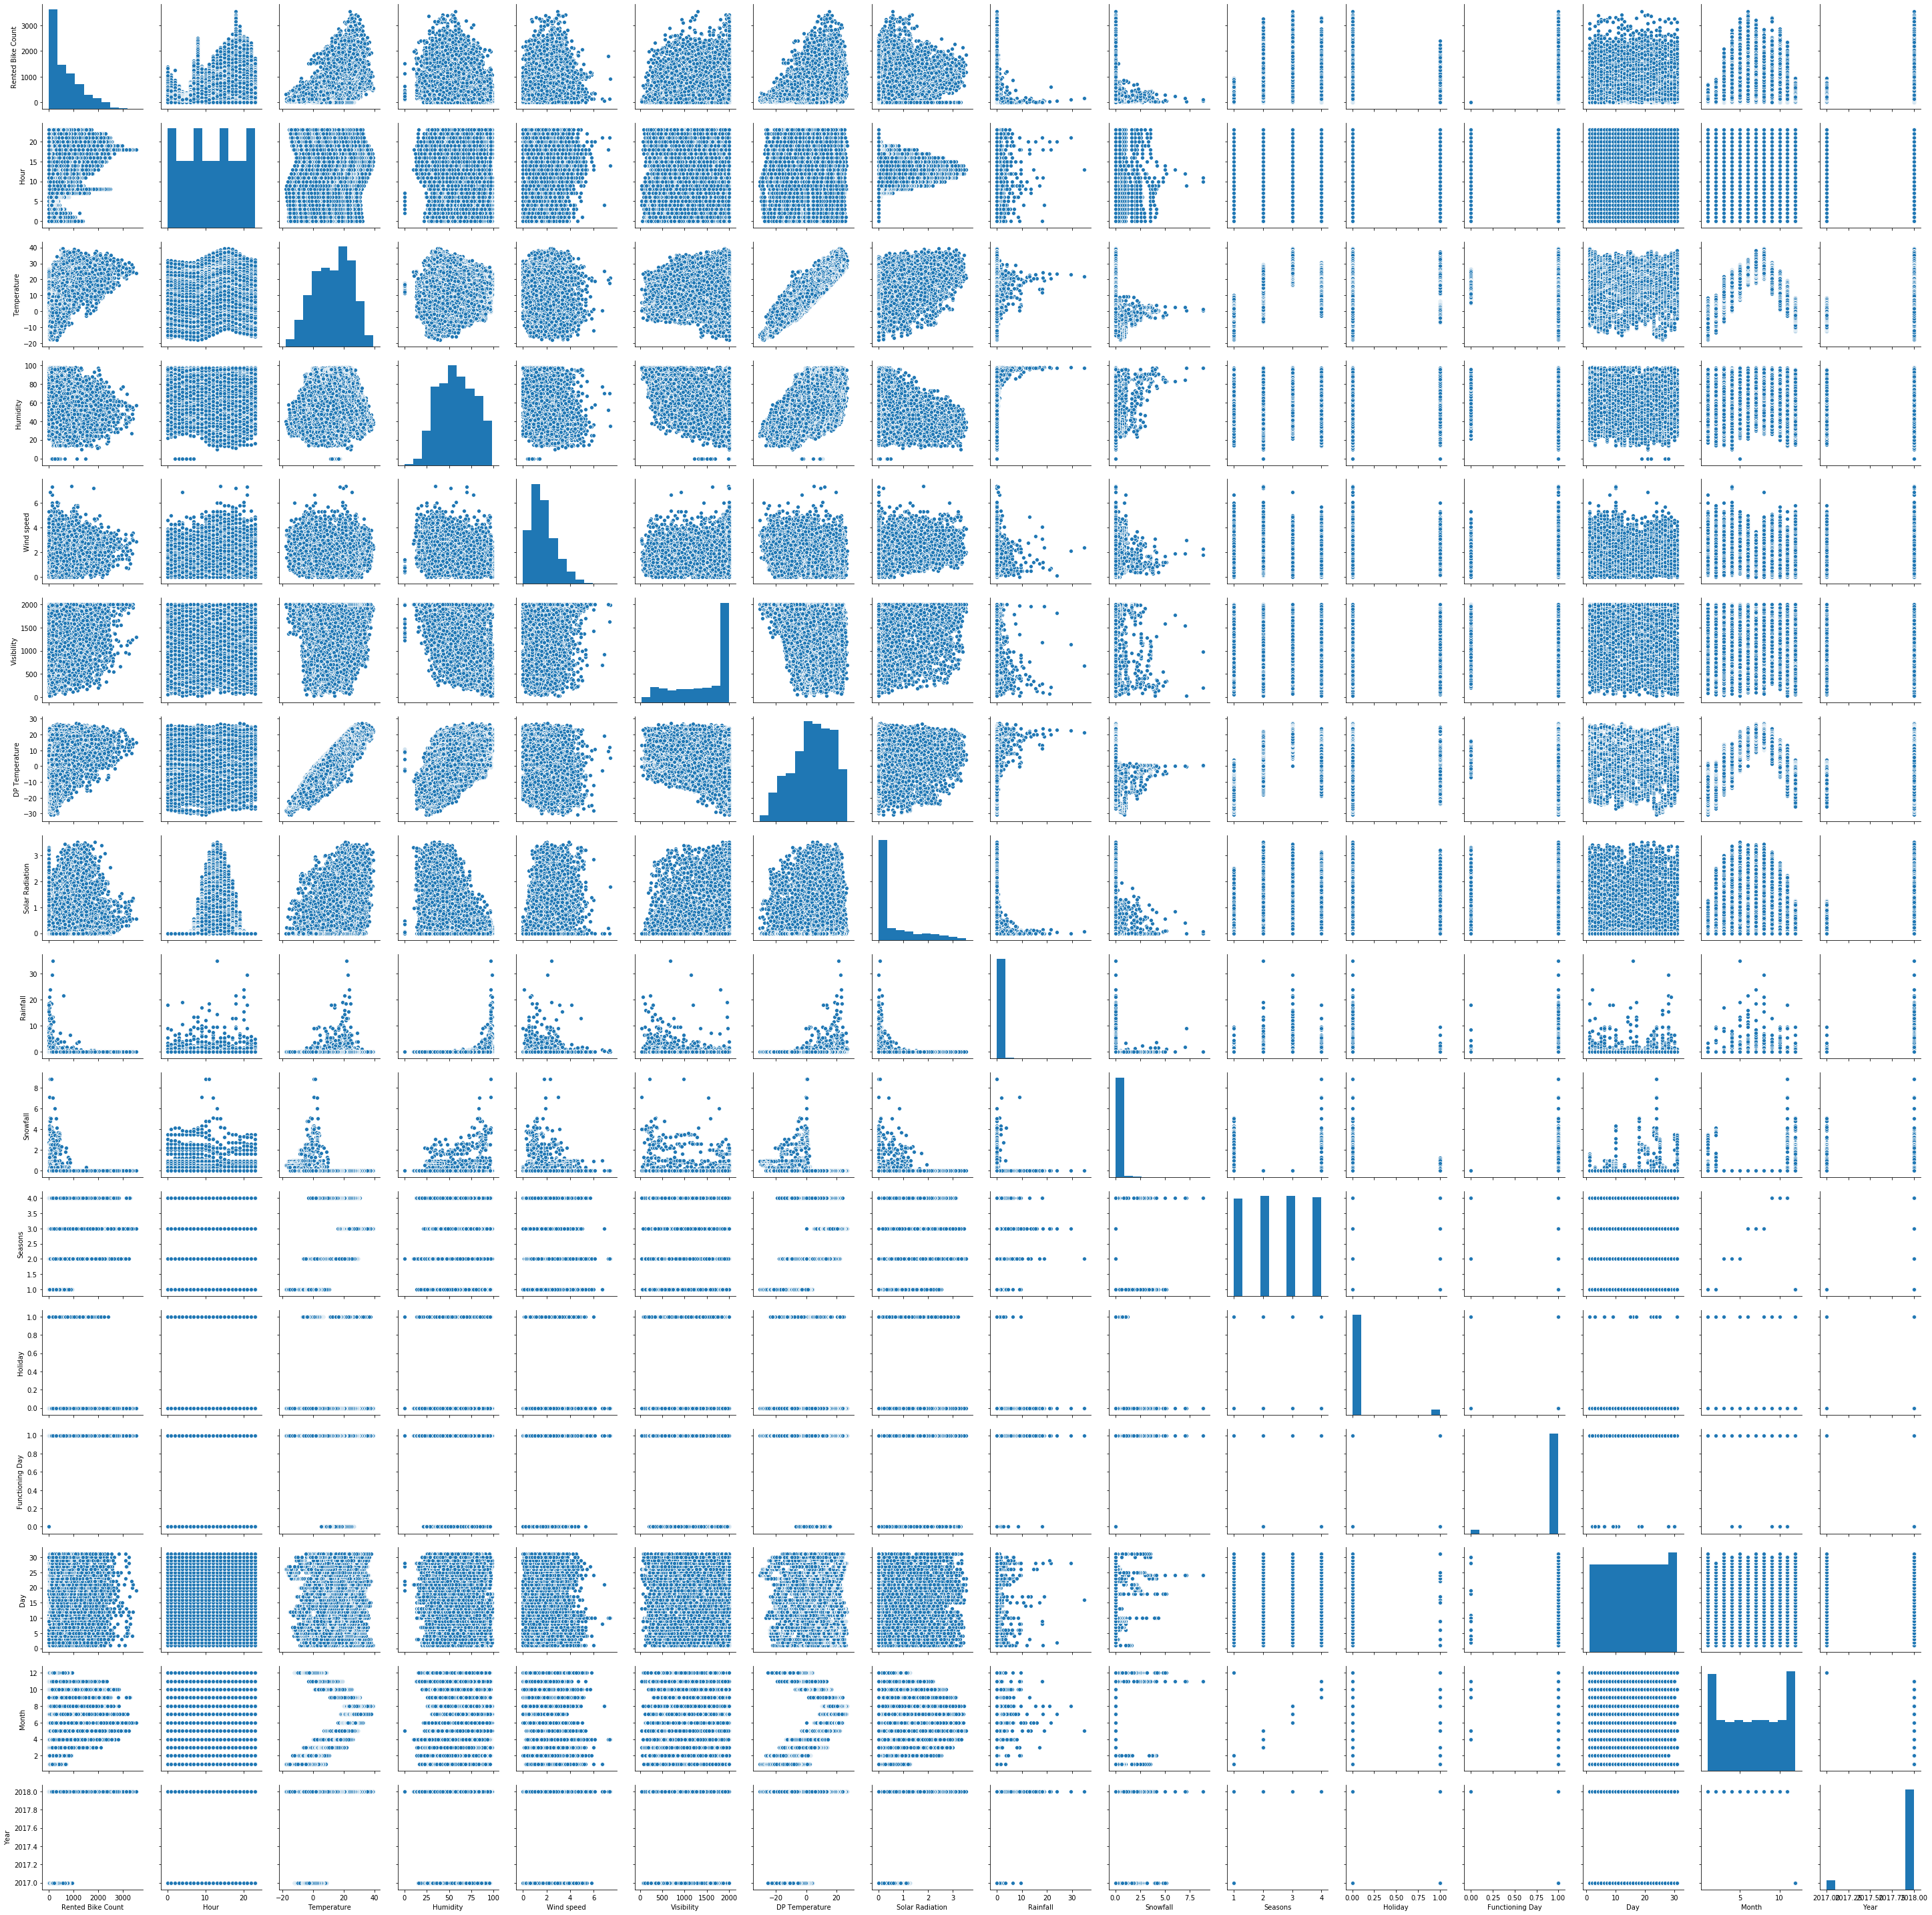

In [21]:
sns.pairplot(df)
plt.show()

# Clean the data

We can start by removing the year, because we can see that most of the values are from 2018 and the year is not very relevant in our prediction, we will just look after the date. We also don't need the seasons because we already use the Month.

In [22]:
df = df.drop(['Year', 'Seasons'], axis = 1)

With the boxplots, we can look for the possible outliers. They are the dots at the top and/or the bottom of each line.

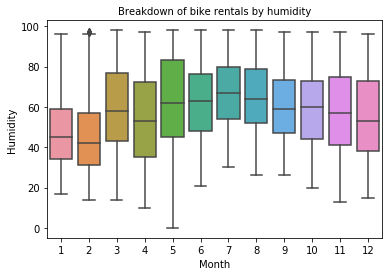

In [23]:
sns.boxplot(x='Month', y='Humidity', data=df).set_title("Breakdown of bike rentals by humidity", fontsize = 10)
plt.show()

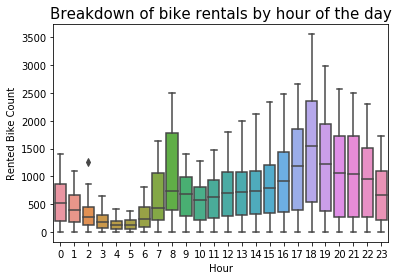

In [24]:
sns.boxplot(x='Hour', y='Rented Bike Count', data=df).set_title("Breakdown of bike rentals by hour of the day", fontsize = 15)
plt.show()

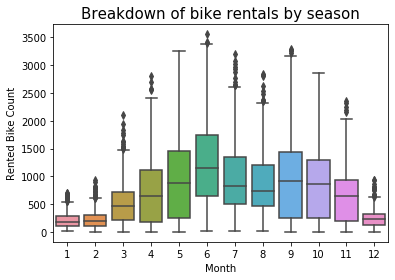

In [25]:
sns.boxplot(x='Month', y='Rented Bike Count', data=df).set_title('Breakdown of bike rentals by season', fontsize = 15)
plt.show()

So we can see that we have several outliers for the variables. We can manage to delete them from our dataset to get accurate results at the end.

To visualize the different boxplots for the variables that I choosed, I must remove the categorical variables such as Date or Seasons, and then separate into 2 variables data1 and data2. The first one contains everything but the Rented Bike Count and Year, the second contains only the Rented Bike Count and the third contains only the Year because those last values are too high compared to the other values. Then, we can try too get more details on some variables.

In [26]:
df1 = df.drop(["Rented Bike Count", "Visibility"], axis=1)

In [27]:
df2 = df["Rented Bike Count"]

In [28]:
df3 = df[["Rainfall", "Snowfall"]]

In [29]:
df4 = df[["Wind speed", "Holiday", "Functioning Day"]]

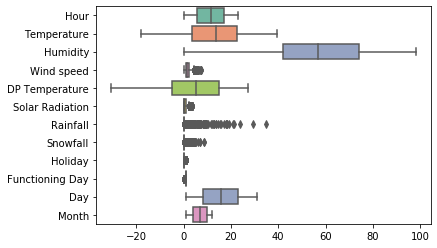

In [30]:
ax = sns.boxplot(data=df1, orient="h", palette="Set2")

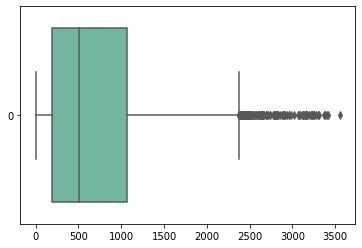

In [31]:
ax = sns.boxplot(data=df2, orient="h", palette="Set2")

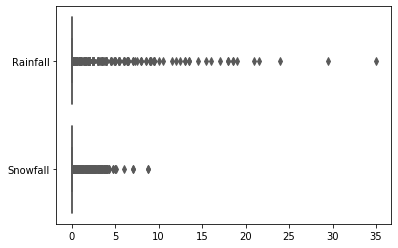

In [32]:
ax = sns.boxplot(data=df3, orient="h", palette="Set2")

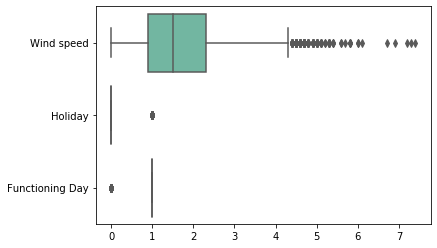

In [33]:
ax = sns.boxplot(data=df4, orient="h", palette="Set2")

# Correlations

Now we can look at the correlation between the variables

In [34]:
corr_matrix = df.corr()
corr_matrix["Rented Bike Count"].sort_values(ascending=False)

Rented Bike Count    1.000000
Temperature          0.538558
Hour                 0.410257
DP Temperature       0.379788
Solar Radiation      0.261837
Functioning Day      0.203943
Visibility           0.199280
Month                0.133514
Wind speed           0.121108
Day                  0.022291
Holiday             -0.072338
Rainfall            -0.123074
Snowfall            -0.141804
Humidity            -0.199780
Name: Rented Bike Count, dtype: float64

Here is a <b>correlation plot</b> of the variables :

- Pearson = linear relationship between two continuous variables. A relationship is linear when a change in one variable is associated with a proportional change in the other variable. 

    We might use a Pearson correlation to evaluate whether increases in temperature at your production facility are associated with decreasing thickness of your chocolate coating. </i>


- Spearman = evaluates the monotonic relationship between two continuous or ordinal variables. In a monotonic relationship, the variables tend to change together, but not necessarily at a constant rate. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.

    Spearman correlation is often used to evaluate relationships involving ordinal variables. For example, you might use a Spearman correlation to evaluate whether the order in which employees complete a test exercise is related to the number of months they have been employed.

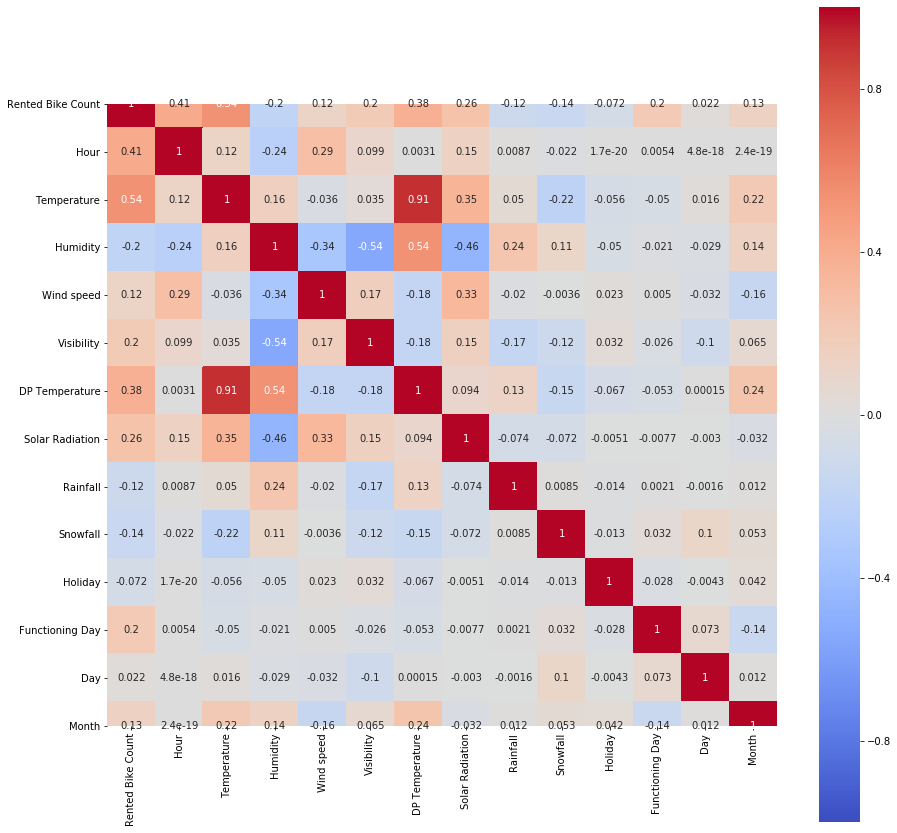

In [35]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);

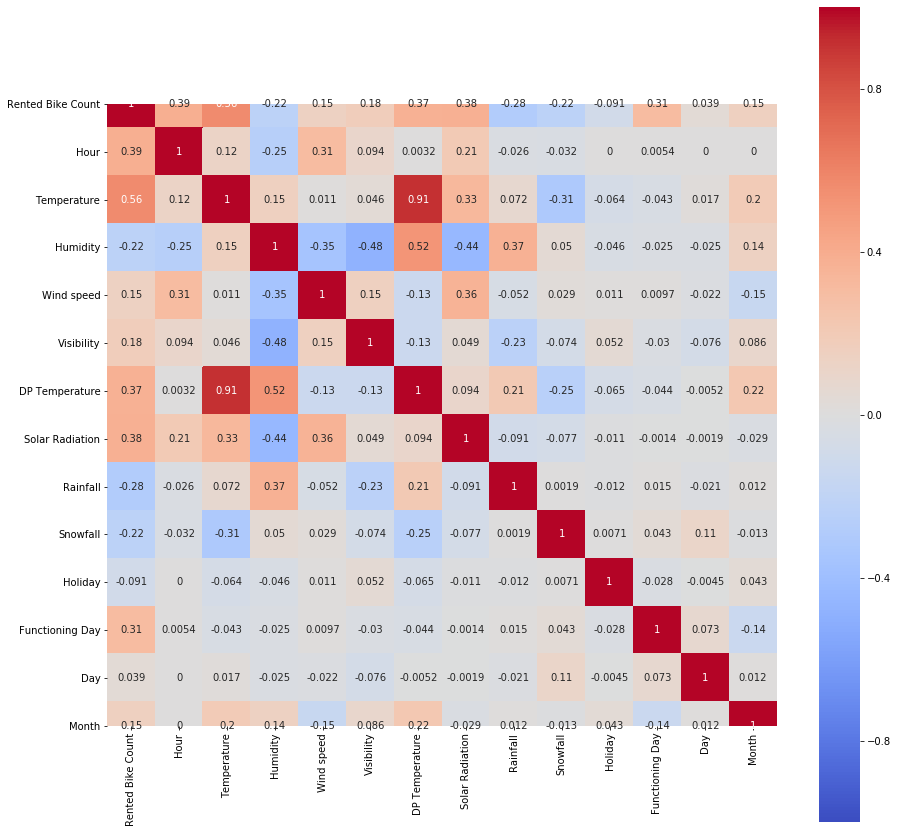

In [36]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr("spearman"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);

We can see a negative correlation with rainfall and snowfall

Temperature and dew point temperature are very correlated, so we will drop dew point temperature from our model because it's less relevant than the temperature

In [37]:
df=df.drop("DP Temperature", axis=1)

# Let's prepare the data

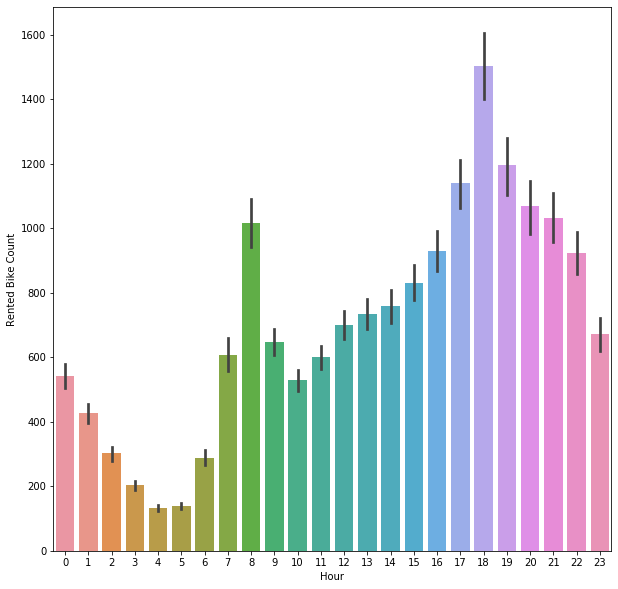

In [38]:
plt.figure(figsize=(10,10))
sns.barplot(x='Hour',y='Rented Bike Count', data=df)

# Clean the data

In [39]:
#find Q1, Q3, and interquartile range for each column
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)

print(IQR)

Rented Bike Count     874.25
Hour                   11.50
Temperature            19.00
Humidity               32.00
Wind speed              1.40
Visibility           1060.00
Solar Radiation         0.93
Rainfall                0.00
Snowfall                0.00
Holiday                 0.00
Functioning Day         0.00
Day                    15.00
Month                   6.00
dtype: float64


Count the outliers

In [40]:
((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).sum()

Rented Bike Count    158
Hour                   0
Temperature            0
Humidity               0
Wind speed           161
Visibility             0
Solar Radiation      641
Rainfall             528
Snowfall             443
Holiday              432
Functioning Day      295
Day                    0
Month                  0
dtype: int64

In [41]:
#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
df_clean = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]
df_clean

Rented Bike Count  Hour  Temperature  Humidity  Wind speed  Visibility  \
0                   254     0         -5.2        37         2.2        2000   
1                   204     1         -5.5        38         0.8        2000   
2                   173     2         -6.0        39         1.0        2000   
3                   107     3         -6.2        40         0.9        2000   
4                    78     4         -6.0        36         2.3        2000   
...                 ...   ...          ...       ...         ...         ...   
8755               1003    19          4.2        34         2.6        1894   
8756                764    20          3.4        37         2.3        2000   
8757                694    21          2.6        39         0.3        1968   
8758                712    22          2.1        41         1.0        1859   
8759                584    23          1.9        43         1.3        1909   

      Solar Radiation  Rainfall  Snowfall  Holiday  Functioning Day  Day  \
0                 0.0       0.0       0.0        0                1    1   
1                 0.0       0.0       0.0        0                1    1   
2                 0.0       0.0       0.0        0                1    1   
3                 0.0       0.0       0.0        0                1    1   
4                 0.0       0.0       0.0        0                1    1   
...               ...       ...       ...      ...              ...  ...   
8755              0.0       0.0       0.0        0                1   30   
8756              0.0       0.0       0.0        0                1   30   
8757              0.0       0.0       0.0        0                1   30   
8758              0.0       0.0       0.0        0                1   30   
8759              0.0       0.0       0.0        0                1   30   

      Month  
0        12  
1        12  
2        12  
3        12  
4        12  
...     ...  
8755     11  
8756     11  
8757     11  
8758     11  
8759     11  

[6339 rows x 13 columns]

In [42]:
#find how many rows are left in the dataframe 
df_clean.shape

(6339, 13)

In [43]:
X = df_clean.drop("Rented Bike Count", axis = 1)
Y = df_clean["Rented Bike Count"]

In [44]:
X

Hour  Temperature  Humidity  Wind speed  Visibility  Solar Radiation  \
0        0         -5.2        37         2.2        2000              0.0   
1        1         -5.5        38         0.8        2000              0.0   
2        2         -6.0        39         1.0        2000              0.0   
3        3         -6.2        40         0.9        2000              0.0   
4        4         -6.0        36         2.3        2000              0.0   
...    ...          ...       ...         ...         ...              ...   
8755    19          4.2        34         2.6        1894              0.0   
8756    20          3.4        37         2.3        2000              0.0   
8757    21          2.6        39         0.3        1968              0.0   
8758    22          2.1        41         1.0        1859              0.0   
8759    23          1.9        43         1.3        1909              0.0   

      Rainfall  Snowfall  Holiday  Functioning Day  Day  Month  
0          0.0       0.0        0                1    1     12  
1          0.0       0.0        0                1    1     12  
2          0.0       0.0        0                1    1     12  
3          0.0       0.0        0                1    1     12  
4          0.0       0.0        0                1    1     12  
...        ...       ...      ...              ...  ...    ...  
8755       0.0       0.0        0                1   30     11  
8756       0.0       0.0        0                1   30     11  
8757       0.0       0.0        0                1   30     11  
8758       0.0       0.0        0                1   30     11  
8759       0.0       0.0        0                1   30     11  

[6339 rows x 12 columns]

In [45]:
Y

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 6339, dtype: int64

Now let's split the dataset for training (80%) and testing (20%) :

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Models

## Linear regression

In [47]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
Y_pred_train = model.predict(X_train)

In [49]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Coefficients: [ 29.25821457  29.20623741  -4.89920443  10.03057123   0.03137799
 -20.57406441   0.           0.           0.           0.
   0.78735341  17.05101115]
Intercept: 152.76980053132797
Mean squared error (MSE): 167407.50
Coefficient of determination (R^2): 0.53


In [50]:
Y_pred_test = model.predict(X_test)

In [51]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Coefficients: [ 29.25821457  29.20623741  -4.89920443  10.03057123   0.03137799
 -20.57406441   0.           0.           0.           0.
   0.78735341  17.05101115]
Intercept: 152.76980053132797
Mean squared error (MSE): 167871.56
Coefficient of determination (R^2): 0.54


In [52]:
yintercept = '%.2f intercept,' % model.intercept_
Hour = '%.2f Hour,' % model.coef_[0]
Temp = '%.2f Temperature,' % model.coef_[1]
Hum = '%.2f Humidity,' % model.coef_[2]
WS = '%.2f Wind speed,' % model.coef_[3]
Vis = '%.2f Visibility,' % model.coef_[4]
SR = '%.2f Solar Radiation,' % model.coef_[5]
Rain = '%.2f Rainfall,' % model.coef_[6]
Snow = '%.2f Snowfall,' % model.coef_[7]
Holiday = '%.2f Holiday,' % model.coef_[8]
FD = '%.2f Functioning day,' % model.coef_[9]
Day = '%.2f Day,' % model.coef_[10]
Month = '%.2f Month,' % model.coef_[11]

In [53]:
print('Rented Bikes = ' + 
      ' ' + 
      yintercept + 
      '\n ' + 
      Hour + 
      '\n ' + 
      Temp + 
      '\n ' + 
      Hum + 
      '\n ' + 
      WS + 
      '\n ' + 
      Vis + 
      '\n ' + 
      SR +
      '\n ' + 
      Rain + 
      '\n ' + 
      Snow + 
      '\n ' + 
      Holiday + 
      '\n ' + 
      FD +
      '\n ' + 
      Day + 
      '\n ' + 
      Month)

Rented Bikes =  152.77 intercept,
 29.26 Hour,
 29.21 Temperature,
 -4.90 Humidity,
 10.03 Wind speed,
 0.03 Visibility,
 -20.57 Solar Radiation,
 0.00 Rainfall,
 0.00 Snowfall,
 0.00 Holiday,
 0.00 Functioning day,
 0.79 Day,
 17.05 Month,


Horizontal plot :

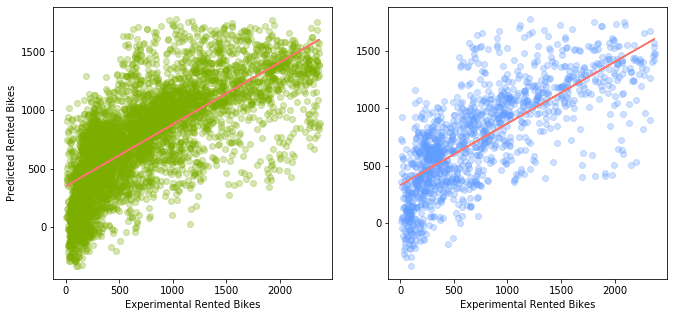

In [54]:
plt.figure(figsize=(11,5))

# 1 row, 2 column, plot 1
plt.subplot(1, 2, 1)
plt.scatter(x=Y_train, y=Y_pred_train, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y_train, Y_pred_train, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted Rented Bikes')
plt.xlabel('Experimental Rented Bikes')

# 1 row, 2 column, plot 2
plt.subplot(1, 2, 2)
plt.scatter(x=Y_test, y=Y_pred_test, c="#619CFF", alpha=0.3)

z = np.polyfit(Y_test, Y_pred_test, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.xlabel('Experimental Rented Bikes')

plt.show()

We could try to do a first prediction

In [55]:
# fit final model
model = LinearRegression()
model.fit(X, Y)
# define one new data instance
Xnew = [[20, 18.5, 6, 2.5, 10.0, 1.0, 0.0, 0.0, 0, 1, 5, 5]]
# make a prediction
ynew = model.predict(Xnew)
# show the inputs and predicted outputs
print("\nX=%s, \nPredicted = %s" % (Xnew[0], ynew[0]))


X=[20, 18.5, 6, 2.5, 10.0, 1.0, 0.0, 0.0, 0, 1, 5, 5], 
Predicted = 1356.278427494169


On a donc un premier modèle qui évolue selon les chiffres donnés !

Par contre, il est linéaire et donc peut être amélioré. Par exemple, si l'on donne une température de 18°C à l'algorithme, il nous retournera plus de vélos loués que pour 5°C. Mais si l'on met une température de 1000°C, le chiffre continuera d'augmenter alors qu'il devrait diminuer lorsque les températures extérieures sont trop élevées. On voit d'ailleurs dans le graphique représentant le nombre de vélos loués en fonction de la température que le chiffre diminue à partir de 30°C.

# Let's compare some models

In [56]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.neighbors import KNeighborsRegressor

In [57]:
score = {}
rmse = {}

## Linear Regression

In [58]:
model1 = LinearRegression()
model1.fit(X_train, Y_train)
# Let's train our model
pred1_train = model1.predict(X_train)
# And test it now :
pred1_test = model1.predict(X_test)

score['Linear regression']= r2_score(Y_test, pred1_test)
rmse['Linear regression']= sqrt(mean_squared_error(Y_test, pred1_test))

In [59]:
print('>>> Linear Regression :')
print('Coefficients:', model1.coef_)
print('Intercept:', model1.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, pred1_test))
print('Coefficient of determination (R^2): %.5f'
      % r2_score(Y_test, pred1_test))

>>> Linear Regression :
Coefficients: [ 29.25821457  29.20623741  -4.89920443  10.03057123   0.03137799
 -20.57406441   0.           0.           0.           0.
   0.78735341  17.05101115]
Intercept: 152.76980053132797
Mean squared error (MSE): 167871.56
Coefficient of determination (R^2): 0.53836


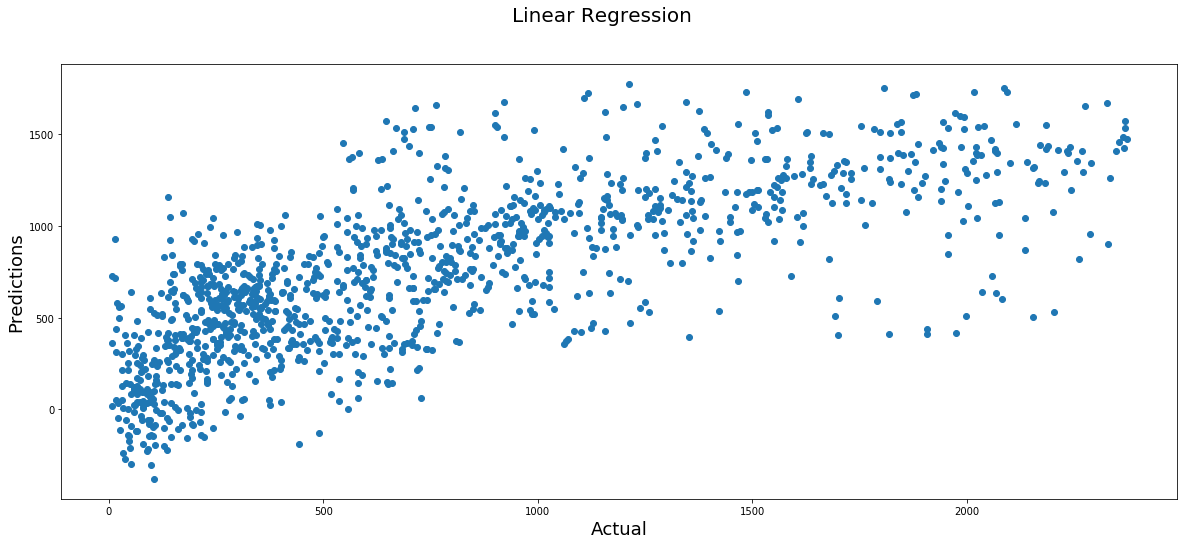

In [60]:
fig = plt.figure(figsize=(20,8))
plt.scatter(Y_test,pred1_test)
plt.xlabel('Actual', fontsize=18)
plt.ylabel('Predictions', fontsize=18)
fig.suptitle('Linear Regression', fontsize=20)
plt.show()

## Ridge

In [61]:
model2 = Ridge()
model2.fit(X_train, Y_train)
# Let's train our model
pred2_train = model2.predict(X_train)
# And test it now :
pred2_test = model2.predict(X_test)

score['Ridge']= r2_score(Y_test, pred2_test)
rmse['Ridge']= sqrt(mean_squared_error(Y_test, pred2_test))

In [62]:
print('>>> Ridge :')
print('Coefficients:', model2.coef_)
print('Intercept:', model2.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, pred2_test))
print('Coefficient of determination (R^2): %.5f'
      % r2_score(Y_test, pred2_test))

>>> Ridge :
Coefficients: [ 29.25832375  29.20581749  -4.89889056  10.02536201   0.03138308
 -20.55724376   0.           0.           0.           0.
   0.78742489  17.05057029]
Intercept: 152.75133203147323
Mean squared error (MSE): 167871.94
Coefficient of determination (R^2): 0.53836


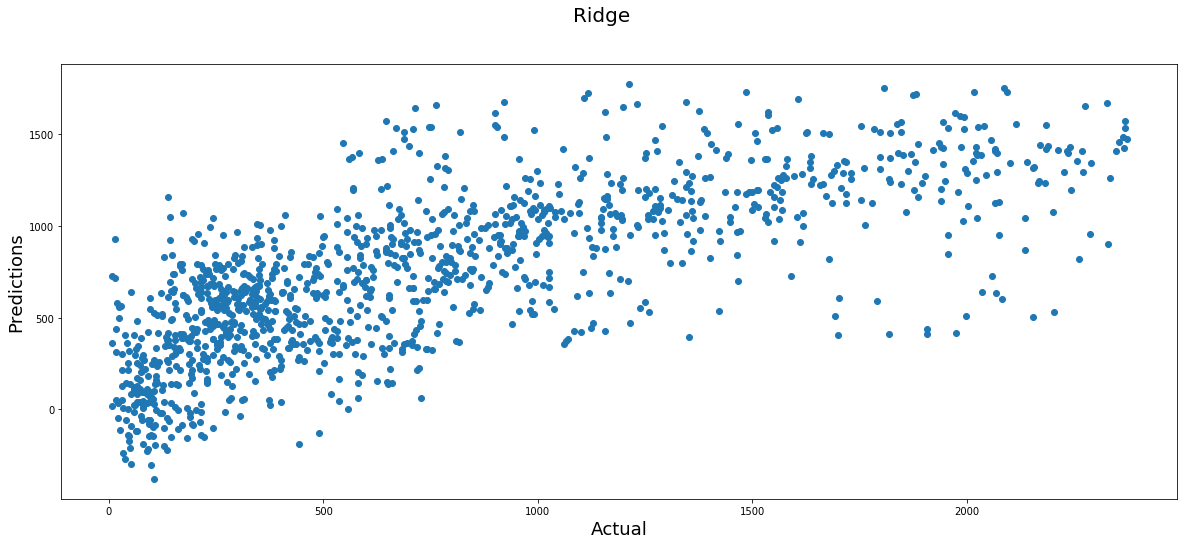

In [63]:
fig = plt.figure(figsize=(20,8))
plt.scatter(Y_test,pred2_test)
plt.xlabel('Actual', fontsize=18)
plt.ylabel('Predictions', fontsize=18)
fig.suptitle('Ridge', fontsize=20)
plt.show()

## Lasso

In [64]:
model3 = Lasso()
model3.fit(X_train, Y_train)
# Let's train our model
pred3_train = model3.predict(X_train)
# And test it now :
pred3_test = model3.predict(X_test)

score['Lasso']= r2_score(Y_test, pred3_test)
rmse['Lasso']= sqrt(mean_squared_error(Y_test, pred3_test))

In [65]:
print('>>> Lasso :')
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, pred3_test))
print('Coefficient of determination (R^2): %.5f'
      % r2_score(Y_test, pred3_test))

>>> Lasso :
Mean squared error (MSE): 167966.47
Coefficient of determination (R^2): 0.53810


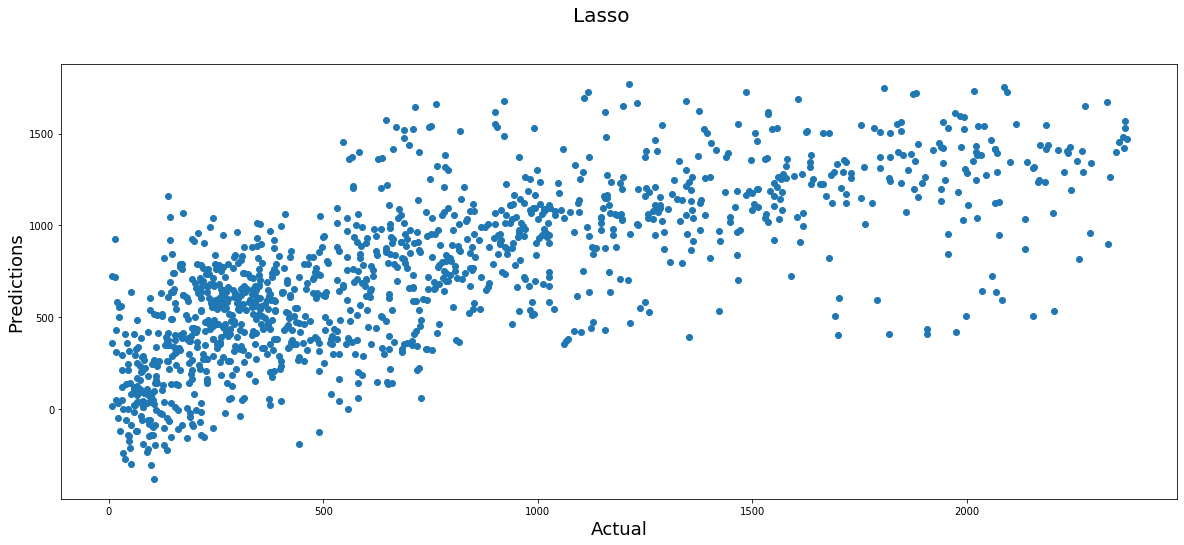

In [66]:
fig = plt.figure(figsize=(20,8))
plt.scatter(Y_test,pred3_test)
plt.xlabel('Actual', fontsize=18)
plt.ylabel('Predictions', fontsize=18)
fig.suptitle('Lasso', fontsize=20)
plt.show()

## KNN

In [67]:
model4 = KNeighborsRegressor()
model4.fit(X_train, Y_train)
# Let's train our model
pred4_train = model4.predict(X_train)
# And test it now :
pred4_test = model4.predict(X_test)

score['KNN']= r2_score(Y_test, pred4_test)
rmse['KNN']= sqrt(mean_squared_error(Y_test, pred4_test))

In [68]:
print('>>> KNN :')
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, pred4_test))
print('Coefficient of determination (R^2): %.5f'
      % r2_score(Y_test, pred4_test))

>>> KNN :
Mean squared error (MSE): 162881.82
Coefficient of determination (R^2): 0.55208


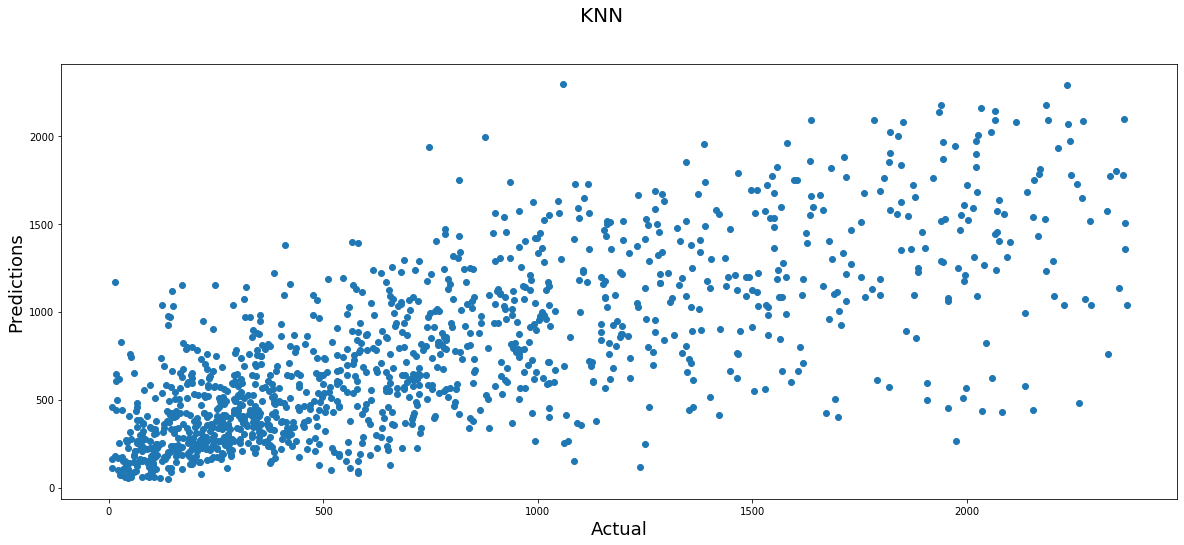

In [69]:
fig = plt.figure(figsize=(20,8))
plt.scatter(Y_test,pred4_test)
plt.xlabel('Actual', fontsize=18)
plt.ylabel('Predictions', fontsize=18)
fig.suptitle('KNN', fontsize=20)
plt.show()

## Logistic Regression

In [70]:
model5 = LogisticRegression()
model5.fit(X_train, Y_train)
# Let's train our model
pred5_train = model5.predict(X_train)
# And test it now :
pred5_test = model5.predict(X_test)

score['Logistic regression']= r2_score(Y_test, pred5_test)
rmse['Logistic regression']= sqrt(mean_squared_error(Y_test, pred5_test))

In [71]:
print('>>> Logistic Regression :')
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, pred5_test))
print('Coefficient of determination (R^2): %.5f'
      % r2_score(Y_test, pred5_test))

>>> Logistic Regression :
Mean squared error (MSE): 266169.40
Coefficient of determination (R^2): 0.26805


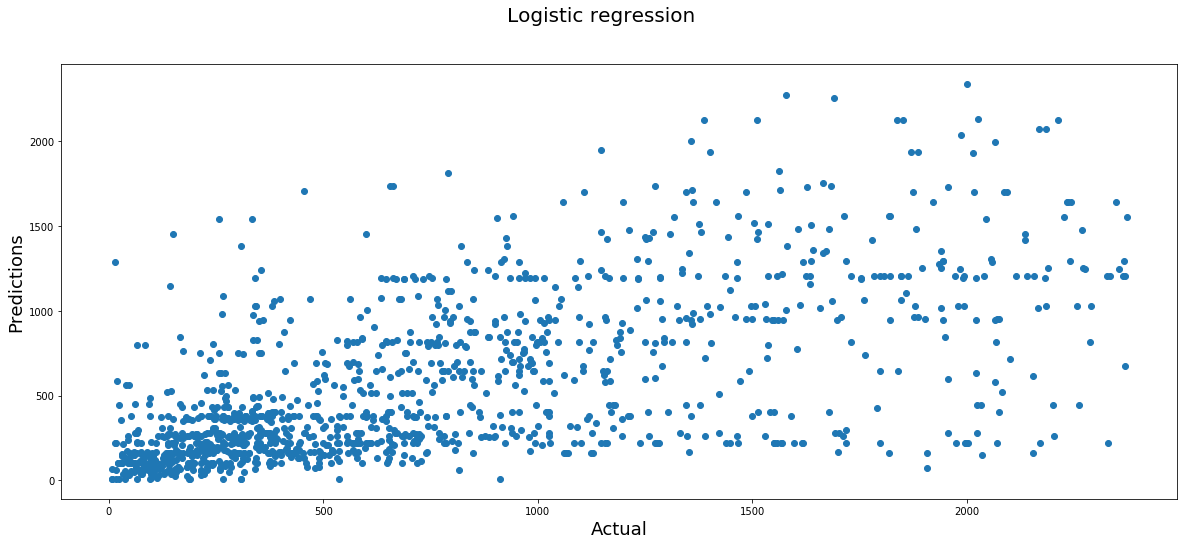

In [72]:
fig = plt.figure(figsize=(20,8))
plt.scatter(Y_test,pred5_test)
plt.xlabel('Actual', fontsize=18)
plt.ylabel('Predictions', fontsize=18)
fig.suptitle('Logistic regression', fontsize=20)
plt.show()

## Random Forest

In [73]:
model6 = RandomForestRegressor()
model6.fit(X_train, Y_train)
# Let's train our model
pred6_train = model6.predict(X_train)
# And test it now :
pred6_test = model6.predict(X_test)

score['Random forest']= r2_score(Y_test, pred6_test)
rmse['Random forest']= sqrt(mean_squared_error(Y_test, pred6_test))

In [74]:
print('>>> Random forest :')
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, pred6_test))
print('Coefficient of determination (R^2): %.5f'
      % r2_score(Y_test, pred6_test))

>>> Random forest :
Mean squared error (MSE): 61142.13
Coefficient of determination (R^2): 0.83186


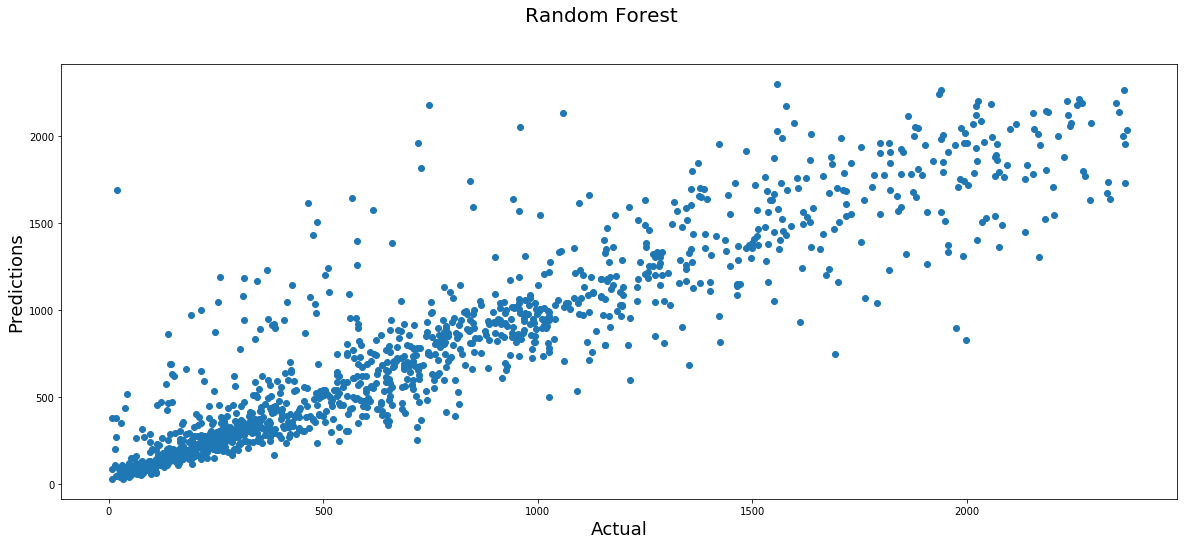

In [75]:
fig = plt.figure(figsize=(20,8))
plt.scatter(Y_test,pred6_test)
plt.xlabel('Actual', fontsize=18)
plt.ylabel('Predictions', fontsize=18)
fig.suptitle('Random Forest', fontsize=20)
plt.show()

## Bagging

In [76]:
model7 = BaggingRegressor()
model7.fit(X_train, Y_train)
# Let's train our model
pred7_train = model7.predict(X_train)
# And test it now :
pred7_test = model7.predict(X_test)

score['Bagging']= r2_score(Y_test, pred7_test)
rmse['Bagging']= sqrt(mean_squared_error(Y_test, pred7_test))

In [77]:
print('>>> Bagging :')
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, pred7_test))
print('Coefficient of determination (R^2): %.5f'
      % r2_score(Y_test, pred7_test))

>>> Bagging :
Mean squared error (MSE): 61817.07
Coefficient of determination (R^2): 0.83001


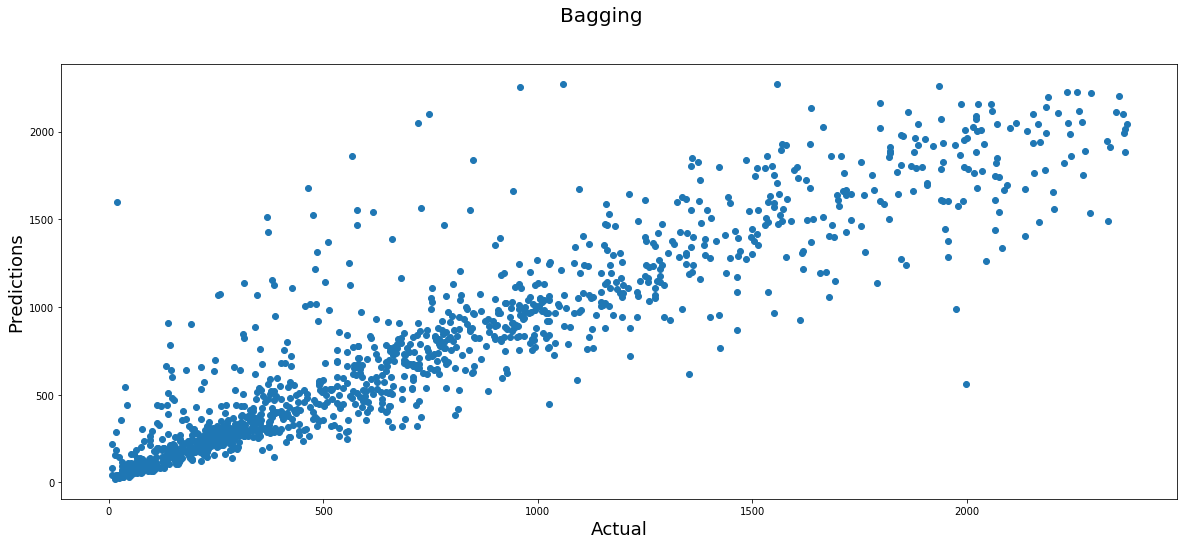

In [78]:
fig = plt.figure(figsize=(20,8))
plt.scatter(Y_test,pred7_test)
plt.xlabel('Actual', fontsize=18)
plt.ylabel('Predictions', fontsize=18)
fig.suptitle('Bagging', fontsize=20)
plt.show()

## Boosting

In [79]:
model8 = AdaBoostRegressor()
model8.fit(X_train, Y_train)
# Let's train our model
pred8_train = model8.predict(X_train)
# And test it now :
pred8_test = model8.predict(X_test)

score['Boosting']= r2_score(Y_test, pred8_test)
rmse['Boosting']= sqrt(mean_squared_error(Y_test, pred8_test))

In [80]:
print('>>> Boosting :')
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, pred8_test))
print('Coefficient of determination (R^2): %.5f'
      % r2_score(Y_test, pred8_test))

>>> Boosting :
Mean squared error (MSE): 108990.70
Coefficient of determination (R^2): 0.70028


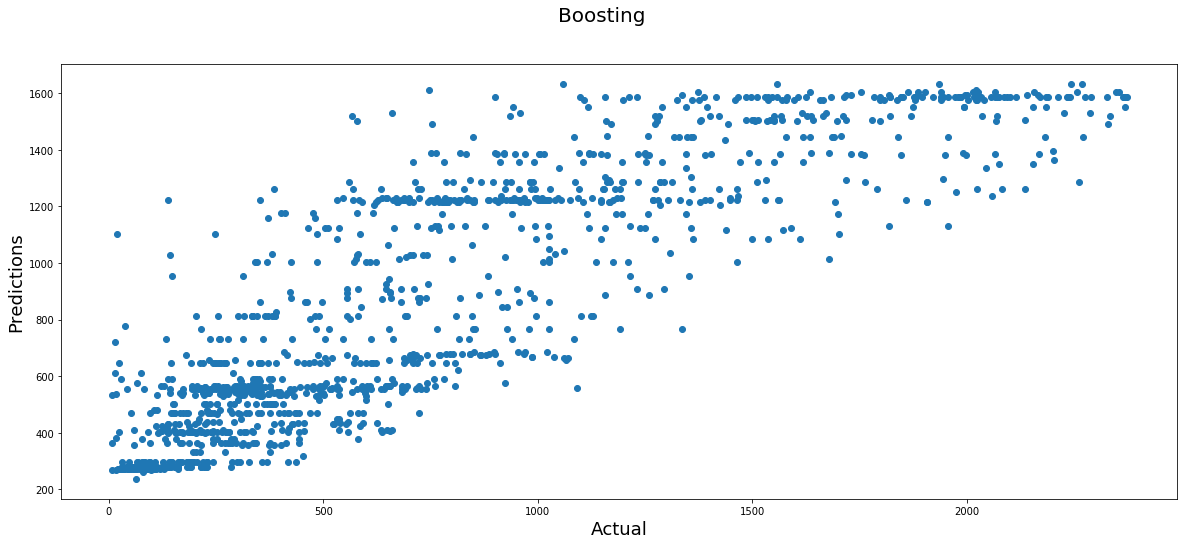

In [81]:
fig = plt.figure(figsize=(20,8))
plt.scatter(Y_test,pred8_test)
plt.xlabel('Actual', fontsize=18)
plt.ylabel('Predictions', fontsize=18)
fig.suptitle('Boosting', fontsize=20)
plt.show()

In [82]:
results=pd.DataFrame()
results['Model']=score.keys()
results['Score']=score.values()
results['RMSE']=rmse.values()

In [83]:
results=results.set_index('Model')

In [84]:
results.sort_values(by =('Score'), ascending = False)

Score        RMSE
Model                                    
Random forest        0.831863  247.269342
Bagging              0.830007  248.630389
Boosting             0.700282  330.137403
KNN                  0.552084  403.586199
Linear regression    0.538363  409.721325
Ridge                0.538362  409.721779
Lasso                0.538102  409.837132
Logistic regression  0.268049  515.916082

We have compared 8 different models, and the Random Forest model seems to be the most performant here. We will pick this model for the next steps of our study.

Sometimes, bagging has a best score, but I not as often as random forest, that's why I will pick random forest.

# Hyperparameter tuning

Now that we've got a good model, we will try to improve it even more by looking after the best parameters.

In [85]:
param_grid = {
    'max_depth': [None, 1,5,10,50],
    "n_estimators": np.arange(4, 200, 25)
}

In [86]:
grid = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=param_grid,
    cv=5
)

In [87]:
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [None, 1, 5, 10, 5

In [88]:
param = grid.best_estimator_
print(param)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=104,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [89]:
df_grid = pd.DataFrame(grid.cv_results_)
params = df_grid.params.apply(pd.Series)
df_grid = pd.concat([params, df_grid], axis=1)

In [90]:
pivot = df_grid.pivot_table(index='max_depth', columns='param_n_estimators', values="mean_test_score")

Text(0.5, 1, 'MSE on test with diff hyperparameters values')

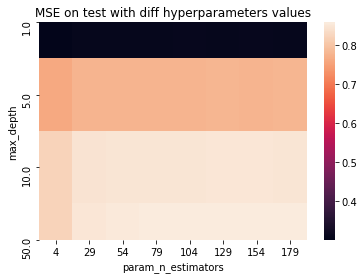

In [91]:
ax = sns.heatmap(pivot)
ax.set_title("MSE on test with diff hyperparameters values")

In [92]:
model_final = param
model_final.fit(X_train, Y_train)
# Let's train our model
pred_train = model_final.predict(X_train)
# And test it now :
pred_test = model_final.predict(X_test)

score['Random forest']= r2_score(Y_test, pred_test)
rmse['Random forest']= sqrt(mean_squared_error(Y_test, pred_test))

In [93]:
print('>>> Random forest :')
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, pred_test))
print('Coefficient of determination (R^2): %.5f'
      % r2_score(Y_test, pred_test))

>>> Random forest :
Mean squared error (MSE): 56505.67
Coefficient of determination (R^2): 0.84461


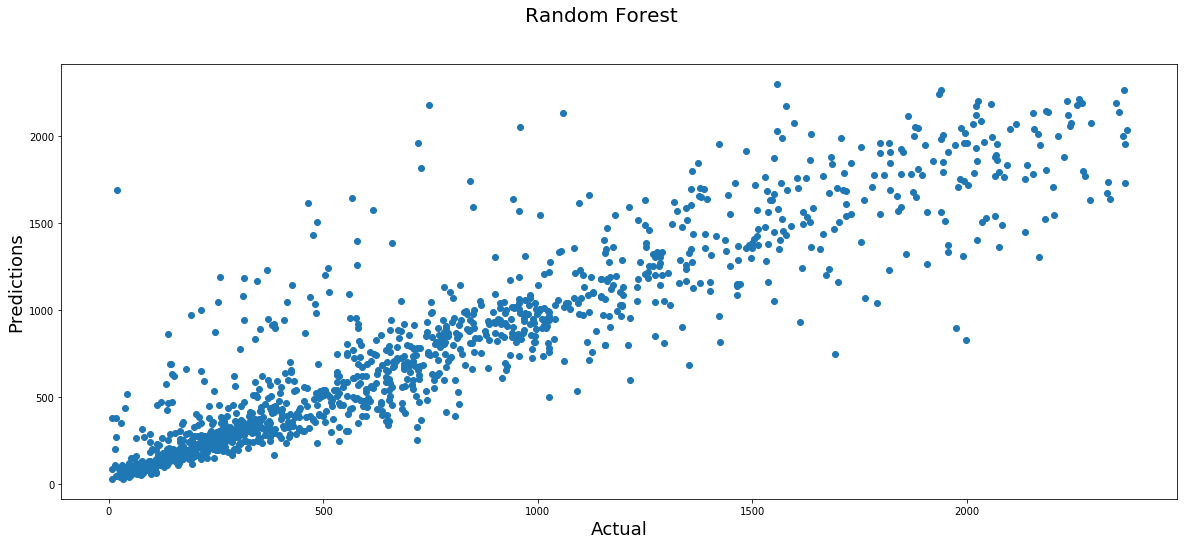

In [94]:
fig = plt.figure(figsize=(20,8))
plt.scatter(Y_test,pred6_test)
plt.xlabel('Actual', fontsize=18)
plt.ylabel('Predictions', fontsize=18)
fig.suptitle('Random Forest', fontsize=20)
plt.show()

# Export the parameters to create our API

In [95]:
import pickle as pkl

In [96]:
with open('model.pkl', 'wb') as f:
    pkl.dump(model_final, f)

Let's try a prediction without the API :

In [97]:
with open('model.pkl', 'rb') as f:
    model = pkl.load(f)

In [98]:
print(model.predict([[13,20,43,2,1500,500,0,0,1,1,6,7]])[0])

1336.8365384615386


The prediction is working ! We can create the API